# Profitable App Profile for the App Store and Google Play Markets

The goal of this project is to use readily available data in order to understand which apps are likely to succeed and profit within the App Store and Google Play market. The information acquired will allow developers to produce their apps to match the data-driven expected needs of the consumer.
The data in question will be pertaining to free applications and directed towards the english speaking audience. The result of this analysis should provide increased revenue through in-app advertisement.

## Data and Exploration

As of September 2018, both markets have provided samples of their data which can be found here 
* https://dq-content.s3.amazonaws.com/350/googleplaystore.csv 
* https://dq-content.s3.amazonaws.com/350/AppleStore.csv

To begin the analysis, both files will be opened and inspected.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from csv import reader
google_df = pd.read_csv('googleplaystore.csv')
apple_df = pd.read_csv('AppleStore.csv')


After opening the files, The first 4 entries as well as the header of the dataset can be seen and taken into account.

In [3]:
apple_df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [4]:
apple_df.shape

(7197, 16)

In [5]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
google_df.shape

(10841, 13)

Taking a look at the data within both files, we can see that there are roughly 18000 apps between the two datasets. The reader can also take a look at some of the information pertaining to popular web apps such as "Facebook" and "Instagram". It can be noted that categories such as "Genres" , "Reviews", and "Category" can all be considered for analyses. Before we make any kind of analysis, we must clean and remove any errors from our datasets as this may cause issues later on.

## Cleaning the Data

Taking a look through the forums of our datasets, it has been reported that the google data has an error entry. This entry is missing a result in the category section of the data and as a result all the data is in the wrong location.

In [7]:
google_df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [8]:
google_df.iat[10472, 1] = 'Lifestyle'
google_df.iat[10472, 2] = '1.9'
google_df.iat[10472, 3] = '19'
google_df.iat[10472, 4] = '3.0M'
google_df.iat[10472, 5] = '1000+'
google_df.iat[10472, 6] = 'Free'
google_df.iat[10472, 7] = '0'
google_df.iat[10472, 8] = 'Everyone'
google_df.iat[10472, 9] = 'NaN'
google_df.iat[10472, 10] = 'February 11, 2018'
google_df.iat[10472, 11] = '1.0.19'
google_df.iat[10472, 12] = '4.0 and up'

In [9]:
google_df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        Lifestyle
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                            1000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

The next issue that comes up is the problem of duplicates within the Google dataset.

In [10]:
google_df[google_df.App == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


Another problem addressed in the google dataset is that there are duplicates in the dataset. As a result, we will be removing these duplicates but not at random. Taking a look at the 4th column of our dataset, the 4th column represents the number of reviews and we will be only keeping the entry with the highest number of reviews

In [11]:
sorted_df = google_df.sort_values(by='Reviews', ascending= False)
sorted_df[sorted_df.App == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [12]:
unique_df = sorted_df.drop_duplicates(subset = ['App'], keep = 'first')
unique_df[unique_df.App == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [13]:
unique_df.shape

(9660, 13)

The code below will remove any applications that occur more than once and leave behind the version of the app with the highest number of reviews in our cleaned dataset.

There are no duplicates within the App store so we do not have any need to apply the same code to the App Store, instead we must remove all the foreign language apps as we are interested in an english speaking audience.


In [14]:
def in_english(string):
    for char in string:
        if ord(char) > 127:
            return False
    return True

In [15]:
print(in_english('Instagram'))
print(in_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))


True
False


In [16]:
print(in_english('Docs To Go™ Free Office Suite'))
print(in_english('Instachat 😜'))

False
False


It can be seen that the in_english function is also removing apps with specialty characters in them. To deal with this problem we will be limiting the total number of special characters to 3.

In [17]:
def in_english(string):
    non_ascii = 0
    for char in string:
        if ord(char) > 127:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True

In [18]:
print(in_english('Docs To Go™ Free Office Suite'))
print(in_english('Instachat 😜'))

True
True


In [19]:
english_apple_df = apple_df[apple_df["track_name"].apply(in_english)]
english_apple_df.tail()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7182,1070854722,Be-be-bears!,480781312,USD,2.99,0,0,0.0,0.0,1.0.2.5,4+,Games,35,5,13,1
7186,1169971902,Hey Duggee: We Love Animals,136347648,USD,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.00,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.00,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.00,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1


In [20]:
english_google_df = unique_df[unique_df["App"].apply(in_english)]
english_google_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7217,CE-STRONG,FAMILY,NaN,0,16M,100+,Free,0,Everyone,Education,"June 17, 2016",1.0.4,4.0 and up
6492,Anime Mod for BM,BOOKS_AND_REFERENCE,NaN,0,8.0M,100+,Free,0,Everyone,Books & Reference,"July 28, 2017",1.0,4.0 and up
7221,CE-SETRAM l’Appli,LIBRARIES_AND_DEMO,NaN,0,2.6M,100+,Free,0,Everyone,Libraries & Demo,"December 5, 2017",1.1.8,4.0.3 and up
5480,Glanceable Ap Watch Face,PERSONALIZATION,NaN,0,11M,5+,Paid,$0.99,Everyone,Personalization,"August 14, 2016",1.0.103,4.4 and up
4177,G-NetReport Pro,TOOLS,NaN,0,1.6M,10+,Paid,$25.99,Everyone,Tools,"June 14, 2018",5.0,4.0 and up


Now that the datasets have been cleaned, we can see that there are roughly 15000 remaining data entries. From these remaining apps, we must filter the free apps from the priced apps as that is our target of interest in our analysis.

In [21]:
FreeGoo_df = english_google_df[english_google_df.Type == 'Free']
FreeGoo_df 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9231,Ec Solutions Mobile,BUSINESS,NaN,0,4.0M,10+,Free,0,Everyone,Business,"November 20, 2016",1.02,4.1 and up
7214,NetApp CE,BUSINESS,NaN,0,21M,100+,Free,0,Everyone,Business,"February 27, 2018",v6.6.0,5.0 and up
7217,CE-STRONG,FAMILY,NaN,0,16M,100+,Free,0,Everyone,Education,"June 17, 2016",1.0.4,4.0 and up
6492,Anime Mod for BM,BOOKS_AND_REFERENCE,NaN,0,8.0M,100+,Free,0,Everyone,Books & Reference,"July 28, 2017",1.0,4.0 and up


In [22]:
FreeApp_df = english_apple_df[english_apple_df.price == 0]
FreeApp_df

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164,1065550288,Tchapper Messenger - Keep it private,82187264,USD,0.0,0,0,0.0,0.0,2.5,4+,Lifestyle,37,0,9,1
7177,1168960919,Golden Lotus Slots,111412224,USD,0.0,0,0,0.0,0.0,1.1.0,17+,Games,37,5,3,1
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1


## Analysis

From this point, we will be building a frequency table in order to find the percentage of any column we are interested in. 

Ex: If we are looking at the Category column, we can find out exactly what percentage of our apps are in the "Games" category. If "Games" have a result of 50, then half of our apps in our dataset are made around the "Games" category.

To minimize risk and the costs of the process we will follow this procedure:

1. Build a base version of the app, and add it to Google Play.
2. If the app is reviewed frequently, we take note of feedback and further improve the app.
3. If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

We'll begin the analysis by gaining a sense of what the Google Play store is made up of with the use of our frequency tables.

In [23]:
f = FreeApp_df.prime_genre
fcounts = f.value_counts()
fpercent = f.value_counts(normalize = True)
fpercent100 = f.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
pg_df = pd.DataFrame({'counts': fcounts, 'per': fpercent, 'percent100': fpercent100})
pg_df

,counts,per,percent100
Games,1874,0.581626,58.2%
Entertainment,254,0.078833,7.9%
Photo & Video,160,0.049659,5.0%
Education,118,0.036623,3.7%
Social Networking,106,0.032899,3.3%
Shopping,84,0.026071,2.6%
Utilities,81,0.025140,2.5%
Sports,69,0.021415,2.1%
Music,66,0.020484,2.0%
Health & Fitness,65,0.020174,2.0%


This display table shows the proportion of "Prime Genre", which represents the applications primary genre. There is a clear majority in the "Games" genre. In addition, "Entertainment" makes up the second highest genre. The two of these factors in tandem result in the market being densely populated with entertainment. This makes a lot of sense, as the longer an individual is spending on their device the more oppertunity for ad revenue.

It is worth noting, other productivity based applications make up roughly 10% of the market. These results however, do not represent the amount of users per category nor the demand for this proportion of apps.

In [24]:
g = FreeGoo_df.Category
gcounts = g.value_counts()
gpercent = g.value_counts(normalize = True)
gpercent100 = g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
category_df = pd.DataFrame({'counts': gcounts, 'per': gpercent, 'percent100': gpercent100})
category_df

,counts,per,percent100
FAMILY,1679,0.189461,18.9%
GAME,858,0.096818,9.7%
TOOLS,749,0.084518,8.5%
BUSINESS,407,0.045926,4.6%
LIFESTYLE,346,0.039043,3.9%
PRODUCTIVITY,345,0.038930,3.9%
FINANCE,328,0.037012,3.7%
MEDICAL,312,0.035206,3.5%
SPORTS,301,0.033965,3.4%
PERSONALIZATION,294,0.033175,3.3%


Upon initial inspection, you may note that family is the leading "Category" on the google play store. However, if you take a look at the family section, you quickly realize that the category is mostly games aimed at smaller children. Like the App store market, the google play store is also dominated by games. In this case however, the ratio of (tools, business, lifestyle, productivity, etc.) related apps has gone up considerably in comparison.

In [25]:
h = FreeGoo_df.Genres
hcounts = h.value_counts()
hpercent = h.value_counts(normalize = True)
hpercent100 = h.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
genre_df = pd.DataFrame({'counts': hcounts, 'per': hpercent, 'percent100': hpercent100})
genre_df

,counts,per,percent100
Tools,748,0.084405,8.4%
Entertainment,538,0.060709,6.1%
Education,474,0.053487,5.3%
Business,407,0.045926,4.6%
Lifestyle,345,0.038930,3.9%
...,...,...,...
Music & Audio;Music & Video,1,0.000113,0.0%
Trivia;Education,1,0.000113,0.0%
Role Playing;Brain Games,1,0.000113,0.0%
Racing;Pretend Play,1,0.000113,0.0%


Although the difference between genres and category aren't particularly clear, it is clear that genres offer a much broader categorization further aiding us in separating each application.

## Most Popular Apps by Genre on the Apple Store

<ipython-input-26-202dc89bb938>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


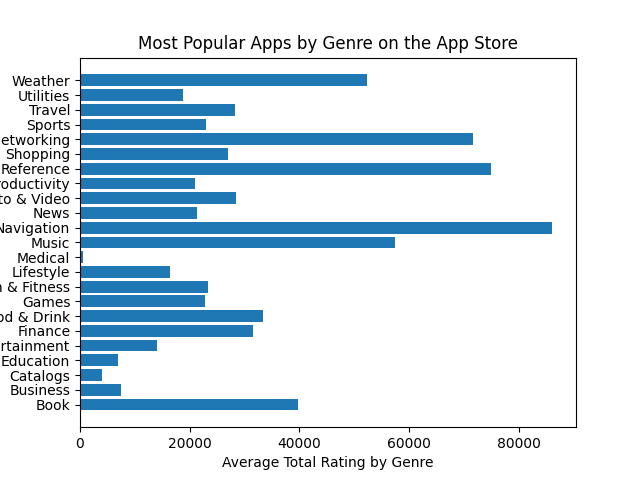

<function matplotlib.pyplot.show(*args, **kw)>

In [26]:
FreeApp_df['rating_count_tot'] = pd.to_numeric(FreeApp_df['rating_count_tot'])
results = FreeApp_df.groupby('prime_genre').sum()
results['avg_rating'] = results['rating_count_tot'] / pg_df['counts']
results = results.reset_index()
a_object = results['prime_genre']
a_rating = results['avg_rating']
plt.barh(results['prime_genre'], results['avg_rating']) 
plt.title('Most Popular Apps by Genre on the App Store')
plt.xlabel('Average Total Rating by Genre')
plt.show

In [27]:
FreeApp_df[FreeApp_df.prime_genre == 'Navigation']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
49,323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,USD,0.0,345046,3040,4.5,4.5,4.24,4+,Navigation,37,5,36,1
130,585027354,Google Maps - Navigation & Transit,120232960,USD,0.0,154911,1253,4.5,4.0,4.31.1,12+,Navigation,37,5,34,1
881,329541503,Geocaching®,108166144,USD,0.0,12811,134,3.5,1.5,5.3,4+,Navigation,37,0,22,1
1633,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,USD,0.0,3582,70,4.0,3.5,10.0.0.984,4+,Navigation,38,5,25,1
3987,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,USD,0.0,187,0,3.5,0.0,9.5,4+,Navigation,37,5,3,1
6033,463431091,Railway Route Search,46950400,USD,0.0,5,0,3.0,0.0,3.17.1,4+,Navigation,37,0,1,1


On average it can be seen that social media, navigation, reference, and music are the most popular genres within the app store but taking into account that each industry is spearheaded by their respective giants.
In the above code, it can be seen that GPS and Google Map services skew the average positively leading individuals to believe these app profiles are more popular than they actually are.
In the case of social media, Facebook and Instagram influence the average of these ratings heavily. For music, Spotify and Shazam do the same and for reference apps the bible and the dictionary (essentials to some) also heavily skew the average.

In [28]:
FreeApp_df[FreeApp_df.prime_genre == 'Reference']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
90,308750436,Dictionary.com Dictionary & Thesaurus,111275008,USD,0.0,200047,177,4.0,4.0,7.1.3,4+,Reference,37,0,1,1
335,364740856,Dictionary.com Dictionary & Thesaurus for iPad,165748736,USD,0.0,54175,10176,4.5,4.5,4.0,4+,Reference,24,5,9,1
551,414706506,Google Translate,65281024,USD,0.0,26786,27,3.5,4.5,5.10.0,4+,Reference,37,5,59,1
715,388389451,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",100551680,USD,0.0,18418,706,4.5,5.0,9.2.1,4+,Reference,37,5,16,1
738,1130829481,New Furniture Mods - Pocket Wiki & Game Tools ...,52959232,USD,0.0,17588,17588,4.5,4.5,1.0,4+,Reference,38,3,2,1
757,399452287,Merriam-Webster Dictionary,155593728,USD,0.0,16849,1125,4.5,4.5,4.1,4+,Reference,38,1,12,1
913,475772902,Night Sky,596499456,USD,0.0,12122,60,4.5,4.5,4.4.1,4+,Reference,37,5,29,1
1106,1135575003,City Maps for Minecraft PE - The Best Maps for...,90124288,USD,0.0,8535,8535,4.0,4.0,1.0,4+,Reference,37,4,1,1
1451,1132715891,LUCKY BLOCK MOD ™ for Minecraft PC Edition - T...,86874112,USD,0.0,4693,4693,4.0,4.0,1.0,12+,Reference,37,4,1,1


Amongst other categories there is quite a bit of game related content, games seem to be an integral part of the App Store. The above code shows that within reference, there is a following for Minecraft related applications. This can be explained by the Minecraft (an online multiplayer building game) community being boundless and having a niche following may lead to great success in application design.

Regardless, the data suggests that the reference category shows quite a bit of potential as it is the second highest average rated category. The reference category in tandem with the book, music, and entertainment category having popularity may lead to the possibility of success in an adopting a novel into an application with supporting music and an embedded dictionary.

Other genres that seem popular include weather, food and drink, and finance. These apps arent as much of an interest to us as:

* Weather apps — The amount of time individuals spend on these apps is relatively brisk and the resulting ad revenue may be very low, in addition to the costly APIs required to manage a weather app.

* Food and drink — Although this category shows potential with the development of food delivery applications and cooking instruction, this requires a fair bit of expertise in another field.

* Finance apps — Like food and drink, this category requires domain knowledge which may cause difficulty in the production process of our application.

Nonetheless, we will further our understanding and fine tune our understanding with our analysis of the Google play market.

## Most Popular Apps by Genre on the Google Play Store

The method we'll be using to determine which app is most popular on the Google play store is by counting the average total number of installations for each category within the dataset. There is an issue with using total installs as the number value in the installs column of the dataset has its values as 1000+, 10000+, or + some number. In order to do actual analysis on this data, we must convert all the values to a float by removing the + and changing the value from a str to a float.

In [42]:
FreeGoo_df['Installs'] = FreeGoo_df['Installs'].str.replace(r'\D', '').astype(int)


AttributeError: Can only use .str accessor with string values!

In [46]:
gresults = FreeGoo_df.groupby('Category').sum()
gresults['avg_rating'] = gresults['Installs'] / category_df['counts']
gresults

,Rating,Installs,avg_rating
Category,,,
ART_AND_DESIGN,238.6,113221100,1.986335e+06
AUTO_AND_VEHICLES,301.3,53080061,6.473178e+05
BEAUTY,179.7,27197050,5.131519e+05
BOOKS_AND_REFERENCE,691.3,1665884260,8.767812e+06
BUSINESS,1038.3,696902090,1.712290e+06
COMICS,221.4,44971150,8.176573e+05
COMMUNICATION,965.7,11036906201,3.845612e+07
DATING,521.7,140914757,8.540288e+05
EDUCATION,442.9,188350000,1.828641e+06


It can be seen that on average, communications apps have the most installs at: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs. (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts)

We mentioned previously for our App Store data that we would like to remove some of the data points that skew our analysis heavily. So we will begin by removing all communication apps that have over 100 million installs.

In [49]:
FreeGoo_df = FreeGoo_df[FreeGoo_df.Installs <= 100000000]
gresults = FreeGoo_df.groupby('Category').sum()
gresults['avg_rating'] = gresults['Installs'] / category_df['counts']
gresults

,Rating,Installs,avg_rating
Category,,,
ART_AND_DESIGN,238.6,113221100,1.986335e+06
AUTO_AND_VEHICLES,301.3,53080061,6.473178e+05
BEAUTY,179.7,27197050,5.131519e+05
BOOKS_AND_REFERENCE,687.4,665884260,3.504654e+06
BUSINESS,1038.3,696902090,1.712290e+06
COMICS,221.4,44971150,8.176573e+05
COMMUNICATION,918.7,2536906201,8.839394e+06
DATING,521.7,140914757,8.540288e+05
EDUCATION,442.9,188350000,1.828641e+06


In [60]:
Google_books_df = FreeGoo_df[FreeGoo_df.Category == 'BOOKS_AND_REFERENCE']
Google_books_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5723,Kinot & Eichah for Tisha B'Av,BOOKS_AND_REFERENCE,4.4,98,6.3M,10000,Free,0,Everyone,Books & Reference,"August 4, 2014",1.5,2.2 and up
156,Offline: English to Tagalog Dictionary,BOOKS_AND_REFERENCE,4.7,967,6.7M,500000,Free,0,Everyone,Books & Reference,"August 4, 2018",1.1.6,4.0.3 and up
5334,Al Quran : EAlim - Translations & MP3 Offline,BOOKS_AND_REFERENCE,4.5,96419,Varies with device,5000000,Free,0,Everyone,Books & Reference,"May 5, 2018",Varies with device,Varies with device
5561,Satellite AR,BOOKS_AND_REFERENCE,4.1,9636,93k,1000000,Free,0,Everyone,Books & Reference,"September 22, 2011",2.4,2.1 and up
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,CompactiMa EC pH Calibration,BOOKS_AND_REFERENCE,NaN,0,8.4M,100,Free,0,Everyone,Books & Reference,"December 22, 2016",1.1.2,4.1 and up
5123,Ag PhD Soybean Diseases,BOOKS_AND_REFERENCE,NaN,0,5.9M,1000,Free,0,Everyone,Books & Reference,"May 8, 2017",1.0.3,4.0.3 and up
4546,Learn R Programming,BOOKS_AND_REFERENCE,NaN,0,29M,10,Free,0,Everyone,Books & Reference,"April 28, 2018",1.0,4.1 and up
4543,Guide for R Programming,BOOKS_AND_REFERENCE,NaN,0,3.7M,5,Free,0,Everyone,Books & Reference,"May 25, 2018",1.0.0,4.1 and up


It seems there are still some popular applications that skew the average so lets take a look at those. We'll quantify a "Popular" application as one with over 50 000 000 installs.

In [66]:
Popular_google = Google_books_df.loc[FreeGoo_df.Installs >= 50000000]
Popular_google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4083,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151,Varies with device,100000000,Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
5651,Audiobooks from Audible,BOOKS_AND_REFERENCE,4.5,568922,Varies with device,100000000,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189,Varies with device,100000000,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
3941,Bible,BOOKS_AND_REFERENCE,4.7,2440695,Varies with device,100000000,Free,0,Teen,Books & Reference,"August 2, 2018",Varies with device,Varies with device


It seems that the niche isn't overly populated by popular apps, showing that the market still has potential.

In [67]:
less_Popular_google = Google_books_df.loc[FreeGoo_df.Installs >= 1000000]
less_Popular_google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5334,Al Quran : EAlim - Translations & MP3 Offline,BOOKS_AND_REFERENCE,4.5,96419,Varies with device,5000000,Free,0,Everyone,Books & Reference,"May 5, 2018",Varies with device,Varies with device
5561,Satellite AR,BOOKS_AND_REFERENCE,4.1,9636,93k,1000000,Free,0,Everyone,Books & Reference,"September 22, 2011",2.4,2.1 and up
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device
166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,23M,5000000,Free,0,Mature 17+,Books & Reference,"June 29, 2018",3.12,4.1 and up
153,AlReader -any text book reader,BOOKS_AND_REFERENCE,4.6,90468,5.9M,5000000,Free,0,Everyone,Books & Reference,"May 27, 2018",1.911805270,2.3 and up
6290,Dictionary.com: Find Definitions for English W...,BOOKS_AND_REFERENCE,4.6,899010,Varies with device,10000000,Free,0,Everyone,Books & Reference,"July 30, 2018",Varies with device,Varies with device
9570,Spanish English Translator,BOOKS_AND_REFERENCE,4.2,87919,Varies with device,10000000,Free,0,Teen,Books & Reference,"May 28, 2018",Varies with device,Varies with device
181,English-Myanmar Dictionary,BOOKS_AND_REFERENCE,4.4,8788,10M,1000000,Free,0,Everyone,Books & Reference,"July 28, 2018",2.5.3,4.0 and up
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,5000000,Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
173,HTC Help,BOOKS_AND_REFERENCE,4.2,8342,Varies with device,10000000,Free,0,Everyone,Books & Reference,"August 28, 2017",9.00.950462,7.0 and up


This niche seems to be made up of software for ebooks, as well as various collections of libraries and dictionaries, so although it may not be a good idea to copy one or the other, it may be a profitable model to encorporate elements of both.

We also notice there is a large number of apps that are made around religious texts, an app that translates or explores details in these texts may be largely profitable albeit slightly immoral to profit off of religion. 

The market is already saturated with resources such as libraries and dictionaries, so in order to be successful we must improve user experience and practicality. 

## Conclusions


Wrapping up our analysis of the App Store and Google Play Markets. 
We concluded that taking a popular book and turning it into an app could be profitable for both the App Store and Google Play markets. Given that the market is saturated with ebooks, we must improve our application in order to be successful. Some possible improvements include an embedded dictionary for complex words, integrated reader soundtrack, audio-visual version of the book, and a connection to social media networks for readers to discuss the book.